# Homework for statistics module

In [ ]:
!pip install bds_courseware

In [ ]:
from bds_courseware import get_dataset

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns

# <<<All the imports here>>>

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to shares;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance for the average value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* Repeat this for these sample sizes: 40 and 500;
* Also a single experiment is repeated 1000 times;

Thus, total number of experiments will be equal to 18 (3 methods of sampling \* 3 cases of distribution parameters \* 2 sample sizes).  

**Example**: you conduct an experiment for random sample method with equal ME and variance of stata. For each strata you sample the data with size equal to 40 and estimate the statistics 1000 times. Thus, now you can average the results or plot boxplots (we suggest you do this) to compare the point estimations for each strata. Then you repeat this for sample size equal to 500. And then you can conduct the same pipeline for different sampling methods.  

Define the parameters of normal distributions, fractions and size of the subsample yourself.
To facilitate the structuring of the code, you can draw up your solution using the specified class:



Point estimate of the mathematical expectation for the average value of subsample formed in random selection from the entire population: $$E\overline{X}_{sep} = 1/n_{sep} * \sum_{i=1}^{n_{sep}} EX_{mix} = 1/n_{sep} * \sum_{i=1}^{n_{sep}} X_i   $$

Point estimate of the mathematical expectation for the average value of subsample formed in random selection of strata in proportion to shares: $$E\overline{X}_{sprop} = W_1E\overline{X}_1 + W_2E\overline{X}_2 + W_3E\overline{X}_3 = \sum_{i=1}^{3} W_i\mu_{i} $$

Point estimate of the mathematical expectation for the average value of subsample formed in random selection according to the optimal sub-sampling: $$E\overline{X}_{sopt} = \frac{1}{\sum_{i=1}^3 W_i\sigma_i}(W_1\sigma_1E\overline{X}_1 + W_2\sigma_2E\overline{X}_2+ W_3\sigma_3E\overline{X}_3) = \frac{1}{\sum_{i=1}^3 W_i\sigma_i}\sum_{i=1}^{3} W_i\sigma_i\mu_{i}$$

Point estimate of the varience for the average value of subsample formed in random selection from the entire population: $$D\overline{X}_{sep} = 1/n_{sep}^2 * \sum_{i=1}^{n_{sep}} DX_{i} = \sigma^2/n_{sep}^2     $$

Point estimate of the varience for the average value of subsample formed in random selection of strata in proportion to shares: $$D\overline{X}_{sprop} = (W_1^2D\overline{X}_1 + W_2^2D\overline{X}_2 + W_3^2D\overline{X}_3) = \sum_{i=1}^{3}W_i^2\sigma_i^2/n_i^2 $$

Point estimate of the varience for the average value of subsample formed in random selection of strata in proportion to shares: $$D\overline{X}_{opt} = (1/({\sum_{i=1}^3 W_i\sigma_i})^2)((W_1\sigma_1)^2D\overline{X}_1 + (W_2\sigma_2)^2D\overline{X}_2 + (W_3\sigma_3)^2D\overline{X}_3) = \frac{1}{\sum_{i=1}^3 (W_i\sigma_i)^2}\sum_{i=1}^{3}W_i^2\sigma_i^4/n_i^2  $$

In [ ]:
class Experiment:

    def __init__(self, means, stds, random_state=1):
        """Initializes our experiment and saves the given distributions
        
        :param means: List of expectations for normal distributions
        :param stds: List of standard deviations for normal distributions
        :param random_state: Parameter fixing randomness. Needed so that when conducting
        experiment repeatedly with the same input parameters, the results remained the same
        """
        self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
        self.stds = stds
        self.means = means
    
    def sample(self, sizes):
        """Creates a population sample
        
        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, 
                                                                sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]
        #Расчет весов страт
        self.weights_strats = [len(strata_sample)/len(self.general_samples) for 
                               strata_sample in self.strats_samples]
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)
        
    def random_subsampling(self, size):
        """Creates a random subset of the entire population
        
        :param sizes: subsample size
        """
        return np.random.choice(self.general_samples, size)
        
    def proportional_subsampling(self, size):
        """Creates a subsample with the number of elements, proportional shares of strata
        
        :param sizes: subsample size
        """
        volumes = [int(size*self.weights_strats[i]) for i in 
                   range(len(self.strats))]
        samples_ids = [np.random.choice(len(self.strats_samples[i]), 
                                        volumes[i]) for i in 
                       range(len(self.strats))]
        samples = [self.strats_samples[i][samples_ids[i]] for i in 
                   range(len(samples_ids))]
        if sum(volumes) < size:
          delta = size - sum(volumes)
          strats_samples_new = self.strats_samples.copy()
          for i in range(delta):
            k = np.random.choice(len(self.strats), p=self.weights_strats)
            samples[k] = np.append(samples[k], 
                                   self.strats_samples[k]
                                   [np.random.randint
                                    (len(self.strats_samples[k]))])
            volumes[k]+=1
        self.strats_prop_sizes=volumes
        return samples
    
    def optimal_subsampling(self, size):
        """Creates a subsample with the optimal number of elements relative to strata
        
        :param sizes: subsample size
        """
        denom = sum(np.array(self.weights_strats) * 
                    np.array([std for std in self.stds]))
        volumes = [int(size*self.weights_strats[i]*self.stds[i]/denom) for i in 
                   range(len(self.strats))]
        samples_ids = [np.random.choice(len(self.strats_samples[i]),
                                        volumes[i]) for i in 
                       range(len(self.strats))]
        samples = [self.strats_samples[i][samples_ids[i]] for 
                   i in range(len(samples_ids))]
        if sum(volumes) < size:
          delta = size - sum(volumes)
          strats_samples_new = self.strats_samples.copy()
          for i in range(delta):
            k = np.random.choice(len(self.strats), 
                                 p=np.array(self.weights_strats) * 
                                 np.array(self.stds)/denom)
            samples[k] = np.append(samples[k], 
                                   self.strats_samples[k]
                                   [np.random.randint
                                    (len(self.strats_samples[k]))])
            volumes[k]+=1
        self.strats_opt_sizes=volumes
        return samples
        
    def run_experiments(self, subsampling_method, n_experiments=1000, size=40):
        """Conducts a series of experiments and saves the results
        
        :param subsampling_method: method for creating a subsample
        :param n_experiments: number of experiment starts
        """
        if subsampling_method not in ['random_subsampling', 'proportional_subsampling', 'optimal_subsampling']:
          print('Такого метода нет')
          return null
        else:
          mat_exps, variences = [], []
          if subsampling_method=='random_subsampling':
            for k in range(n_experiments):
              sample = self.random_subsampling(size)
              mat_exps.append(np.mean(sample))
            return mat_exps

          else:
            for k in range(n_experiments):
              if subsampling_method=='proportional_subsampling':
                sample = self.proportional_subsampling(size)
              elif subsampling_method=='optimal_subsampling':   
                sample = self.optimal_subsampling(size)   
              sample = np.hstack(sample)
              mat_exps.append(np.mean(sample))
            return mat_exps

In [ ]:
def show_results(experiment,n):
  means_r = experiment.run_experiments('random_subsampling')
  means_p = experiment.run_experiments('proportional_subsampling')
  means_o = experiment.run_experiments('optimal_subsampling')
  data_box_me = pd.DataFrame([means_r, means_p, means_o]).T
  data_box_me = data_box_me.rename(columns={0:'random_subsampling',
                                            1:'proportional_subsampling',
                                            2:'optimal_subsampling'})
  # data_box_var = pd.DataFrame([variences_r, variences_p, variences_o]).T
  # data_box_var = data_box_var.rename(columns={0:'random_subsampling',
  #                                             1:'proportional_subsampling',
  #                                             2:'optimal_subsampling'})
  fig = plt.figure()
  fig.suptitle('Means for the average value for case all strata have the same mat. expectations and variance, size={}'.format(n), fontsize=16)
  ax1 = fig.add_axes([0, -0.2, 1, 1])
  # ax2 = fig.add_axes([1.25, -0.2, 1, 1])
  sns.boxplot(data=data_box_me, orient='v', ax=ax1).set_title('Mat. expectation')
  # sns.boxplot(data=data_box_var, orient='v', ax=ax2).set_title('Variences')
  fig.show()

  print('Sample mean pointwise estimation')
  print('\nRandom sampling from GP:')
  print(str.format('\tTheoretical ME: {}', experiment.m))
  print(str.format('\tEmpirical ME: {}', np.mean(means_r)))
  print(str.format('\n\tTheoretical Dispersion: {0:.3f}', (experiment.sigma**2)/n))
  print(str.format('\tEmpirical Dispersion: {0:.3f}', np.var(means_r)))

  disp_prop = sum([(w**2)*((sigma**2)/n_k**2)
                       for n_k, w, sigma
                       in zip(experiment.strats_prop_sizes, experiment.weights_strats, experiment.stds)])
  print('\nProportional sampling from GP:')
  print(str.format('\tTheoretical ME: {}', np.dot(experiment.weights_strats,experiment.means)))
  print(str.format('\tEmpirical ME: {}', np.mean(means_p)))
  print(str.format('\n\tTheoretical Dispersion: {0:.3f}', (disp_prop)))
  print(str.format('\tEmpirical Dispersion: {0:.3f}', np.var(means_r)))

  mean_opt = sum([(w*sigma*mu) for w, sigma, mu in zip(experiment.weights_strats,experiment.stds,experiment.means)])
  disp_opt = sum([(w**2)*((sigma**4)/n_k**2)/np.dot(experiment.weights_strats,experiment.stds)
                       for n_k, w, sigma
                       in zip(experiment.strats_opt_sizes, experiment.weights_strats, experiment.stds)])
  print('\nProportional sampling from GP:')
  print(str.format('\tTheoretical ME: {}', mean_opt))
  print(str.format('\tEmpirical ME: {}', np.mean(means_o)))
  print(str.format('\n\tTheoretical Dispersion: {0:.3f}', (disp_opt)))
  print(str.format('\tEmpirical Dispersion: {0:.3f}', np.var(means_o)))

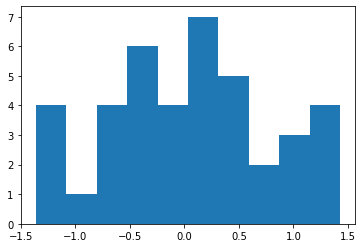

In [ ]:
experiment = Experiment([0, 0, 0], [1, 1, 1])
experiment.sample([20, 5, 15])
plt.hist(experiment.general_samples);

### Element number for general population = 40, mat_exp and disp are equal between all strata:

Sample mean pointwise estimation

Random sampling from GP:
	Theoretical ME: -0.09439260256788193
	Empirical ME: -0.08901783314190849

	Theoretical Dispersion: 0.015
	Empirical Dispersion: 0.015

Proportional sampling from GP:
	Theoretical ME: 0.0
	Empirical ME: -0.09927114345428456

	Theoretical Dispersion: 0.002
	Empirical Dispersion: 0.015

Proportional sampling from GP:
	Theoretical ME: 0.0
	Empirical ME: -0.09496469171212285

	Theoretical Dispersion: 0.002
	Empirical Dispersion: 0.014


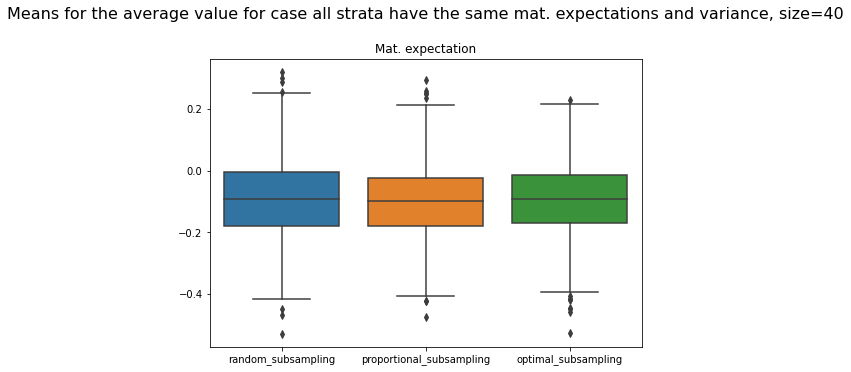

In [ ]:
experiment = Experiment([0, 0, 0], [1, 1, 1])
experiment.sample([20, 5, 15])
show_results(experiment,40)

###Element number for general population = 500, mat_exp and disp are equal between all strata:

Sample mean pointwise estimation

Random sampling from GP:
	Theoretical ME: -0.09439260256788193
	Empirical ME: -0.10155042724147638

	Theoretical Dispersion: 0.001
	Empirical Dispersion: 0.016

Proportional sampling from GP:
	Theoretical ME: 0.0
	Empirical ME: -0.0974856824436016

	Theoretical Dispersion: 0.002
	Empirical Dispersion: 0.016

Proportional sampling from GP:
	Theoretical ME: 0.0
	Empirical ME: -0.09607582521722728

	Theoretical Dispersion: 0.002
	Empirical Dispersion: 0.014


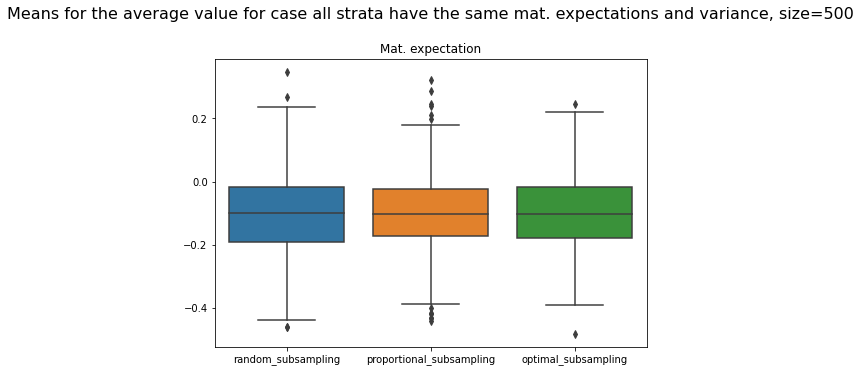

In [ ]:
show_results(experiment,500)

По результатам проведенных экпериментов можно заметить, что оценки для трех методов семлирования получились схожими. По ящикам с усами видно что немного лучший IQR показал метод оптимального семплирования в случае 40 элементов, в случае 500 - пропорциональго, но выбросов меньше дал метод оптимального сэмплирования. Также можно сказать что оценка дисперсии на 500 экспериментах зачастую хуже чем аналогичные оценки для других методов.

###Element number for general population = 40, mat_exp are different, disp are equal between all strata:

Sample mean pointwise estimation

Random sampling from GP:
	Theoretical ME: 3.037180369161547
	Empirical ME: 3.08443162993002

	Theoretical Dispersion: 0.208
	Empirical Dispersion: 0.213

Proportional sampling from GP:
	Theoretical ME: 3.125
	Empirical ME: 3.0408229383579557

	Theoretical Dispersion: 0.002
	Empirical Dispersion: 0.213

Proportional sampling from GP:
	Theoretical ME: 3.125
	Empirical ME: 3.0299895995661563

	Theoretical Dispersion: 0.002
	Empirical Dispersion: 0.029


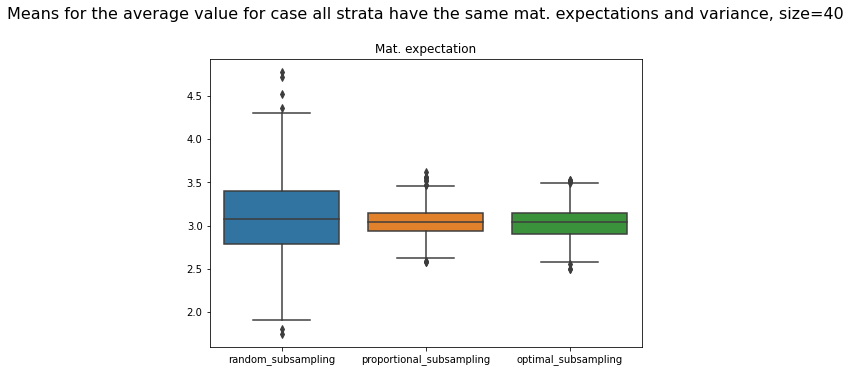

In [ ]:
experiment = Experiment([1, 3, 6], [1, 1, 1])
experiment.sample([20, 5, 15])
show_results(experiment,40)

###Element number for general population = 500, mat_exp are different, disp are equal between all strata:

Sample mean pointwise estimation

Random sampling from GP:
	Theoretical ME: 3.1119119852637214
	Empirical ME: 3.117536948506581

	Theoretical Dispersion: 0.011
	Empirical Dispersion: 0.141

Proportional sampling from GP:
	Theoretical ME: 3.125
	Empirical ME: 3.1056576681385013

	Theoretical Dispersion: 0.002
	Empirical Dispersion: 0.141

Proportional sampling from GP:
	Theoretical ME: 3.125
	Empirical ME: 3.109690687683484

	Theoretical Dispersion: 0.002
	Empirical Dispersion: 0.019


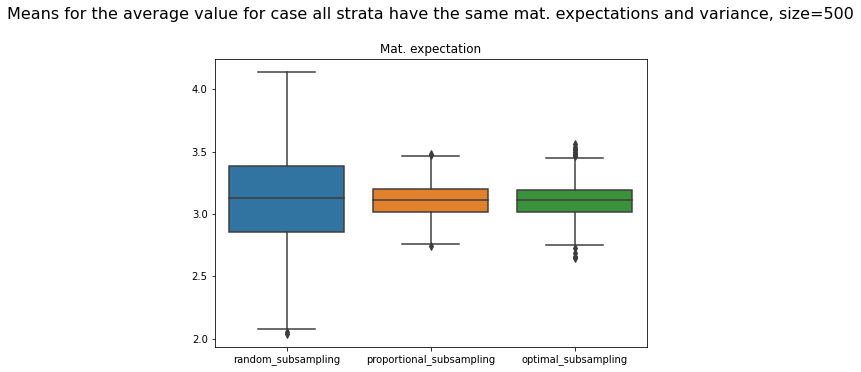

In [ ]:
experiment = Experiment([1, 3, 6], [1, 1, 1])
experiment.sample([20, 5, 15])
show_results(experiment,500)

Результаты экспериментов для случая разных матожиданий и одинаковых дисперсий следующие:
1. Оценка матожиданий среднего имеет меньший разброс для пропорционального метода, чуть хуже для оптимальногональго. 
2. Оценки для рандомизированного метода имеют ощутимо больший разброс.

###Element number for general population = 40, mat_exp and disp are different between all strata:

Sample mean pointwise estimation

Random sampling from GP:
	Theoretical ME: 3.3866260844197327
	Empirical ME: 3.413962627806226

	Theoretical Dispersion: 0.261
	Empirical Dispersion: 0.262

Proportional sampling from GP:
	Theoretical ME: 3.125
	Empirical ME: 3.3754363888690375

	Theoretical Dispersion: 0.006
	Empirical Dispersion: 0.262

Proportional sampling from GP:
	Theoretical ME: 7.375
	Empirical ME: 5.486997803520653

	Theoretical Dispersion: 0.009
	Empirical Dispersion: 0.179


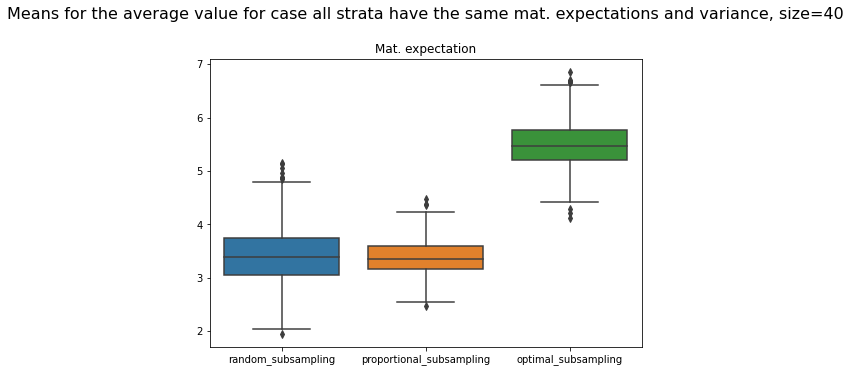

In [ ]:
experiment = Experiment([1, 3, 6], [0.5, 1, 3])
experiment.sample([20, 5, 15])
show_results(experiment,40)

###Element number for general population = 500, mat_exp and disp are different between all strata:

Sample mean pointwise estimation

Random sampling from GP:
	Theoretical ME: 3.3866260844197327
	Empirical ME: 3.3892843902023904

	Theoretical Dispersion: 0.021
	Empirical Dispersion: 0.277

Proportional sampling from GP:
	Theoretical ME: 3.125
	Empirical ME: 3.387514640265133

	Theoretical Dispersion: 0.006
	Empirical Dispersion: 0.277

Proportional sampling from GP:
	Theoretical ME: 7.375
	Empirical ME: 5.484824563112942

	Theoretical Dispersion: 0.009
	Empirical Dispersion: 0.194


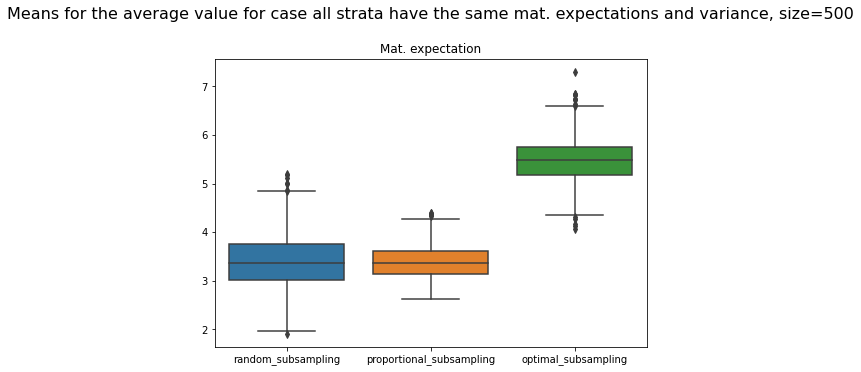

In [ ]:
show_results(experiment,500)

Результаты экспериментов для случая разных матожиданий и дисперсий следующие:
1.Оценка матожидания для оптимального семплирования стала намного больше. Предполагаю что это связано с тем, что на пропорции в методе оптимального семплирования влияет значение стандартного отклонения, что вызывает подобные результаты.

# Task 2

Data is here https://drive.google.com/drive/folders/1zlvCNV6zNY9i3KIiFM6McByEgPBn_y2w?usp=sharing

### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.

**Data is in `HW1_task2_brain_data.tsv`**

### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)

**Data is in `HW1_task2_car_prefs_data.tsv`**

In [ ]:
data = get_dataset('brain')
len(data)

40

In [ ]:
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


In [ ]:
data.describe()

,FSIQ,VIQ,PIQ,MRI_Count
count,40.000000,40.000000,40.00000,4.000000e+01
mean,113.450000,112.350000,111.02500,9.087550e+05
std,24.082071,23.616107,22.47105,7.228205e+04
min,77.000000,71.000000,72.00000,7.906190e+05
25%,89.750000,90.000000,88.25000,8.559185e+05
50%,116.500000,113.000000,115.00000,9.053990e+05
75%,135.500000,129.750000,128.00000,9.500780e+05
max,144.000000,150.000000,150.00000,1.079549e+06


In [ ]:
data['Gender'].value_counts()

Male      20
Female    20
Name: Gender, dtype: int64

Всего имеется 40 наборов данных. Столбцы Weight и Height имеют пропущенные значения, но, к счастью, нам они не нужны. Остальные столбцы имеют приблизительно одинаковые распределения. Количество мужчин и женщин одинаковове.

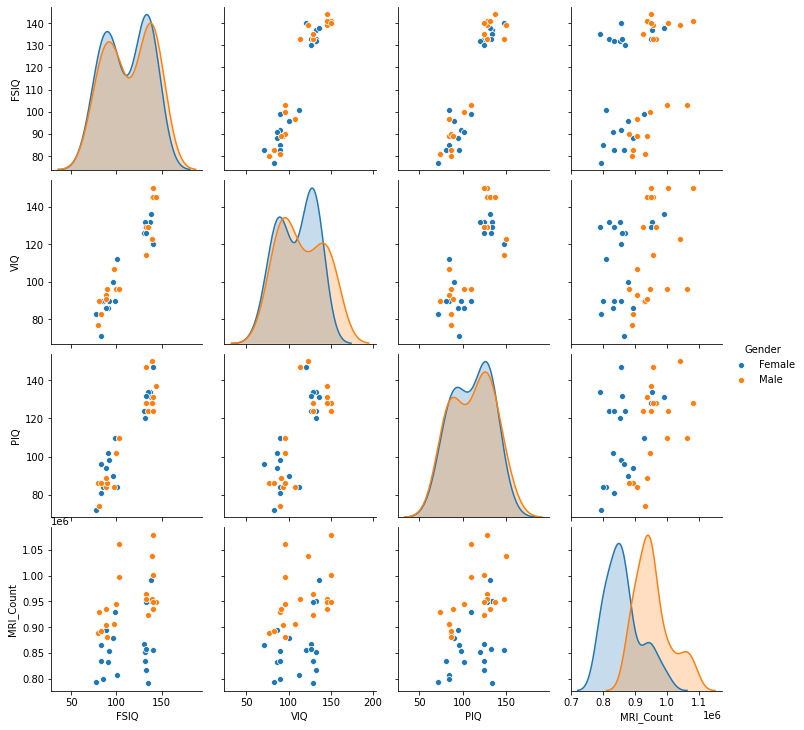

In [ ]:
sns.pairplot(data, hue="Gender", diag_kind='kde');

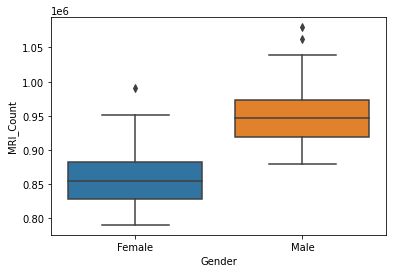

In [ ]:
sns.boxplot(y='MRI_Count',x='Gender',data = data);

Из графиков можно сделать вывод что в целом данные для мужчин  женщин схожи, за исключением показателя MRI_count, на нем видно смещение показателей для мужчин.

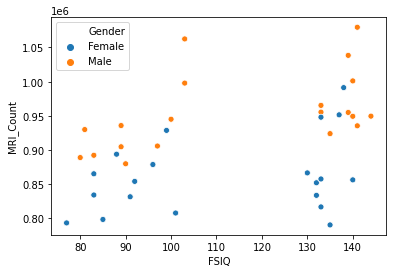

In [ ]:
sns.scatterplot(y='MRI_Count',x='FSIQ',data = data, hue='Gender');

In [ ]:
stat, pv = st.pearsonr(data['FSIQ'], data['MRI_Count'])
print('Значение статистики = {}, p-value={}'.format(stat,pv))

Значение статистики = 0.35764096936905665, p-value=0.02346891262690166


Коэффициент корреляции Пирсона имеет значение - 0.35764096936905665, что означает что между переменными FSIQ и MRI_Count есть линейная зависимость и они сонаправлены. p-value < 0.05, значит коэффициент корреляции значим. 
Проверим теперь переменные на наличие монотонной связи с помощью критерия Спирмена.

In [ ]:
st.spearmanr(data['FSIQ'], data['MRI_Count'])

SpearmanrResult(correlation=0.47214191583899207, pvalue=0.0020984777996441214)

Коэффициент корреляции Спирмена равен 0.47214191583899207, что говорит о том,что связь между переменными есть, но слабая.Также из коэффициента корреляции следует монотоная сонаправленность. p-value < 0.05, значит коэффициент корреляции значим



In [ ]:
data_men = data[data['Gender']=='Male']
data_women = data[data['Gender']=='Female']

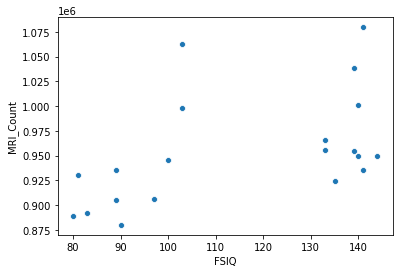

In [ ]:
sns.scatterplot(y='MRI_Count',x='FSIQ',data = data_men);

In [ ]:
print(st.pearsonr(data_men['FSIQ'], data_men['MRI_Count']))
st.spearmanr(data_men['FSIQ'], data_men['MRI_Count'])

(0.49836911041719256, 0.025319401349742674)


SpearmanrResult(correlation=0.6224582598536048, pvalue=0.0033787319187759068)

Результаты проверки наличия корреляции для данных о мужчинах следующие:
1. Оба коэффициента положительные, значит есть положительная связь между переменными.
2. Коэффициенты корреляции получились большими по сравнению с данными без фильтрации, значит связь сильнее.
3. p-value в обоих случаях меньше 0.05, значит оба коэффициента значимы.

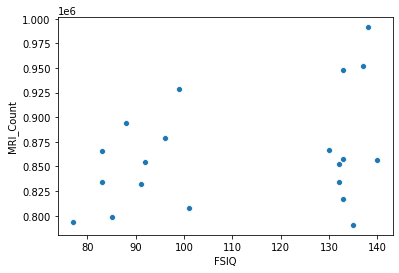

In [ ]:
sns.scatterplot(y='MRI_Count',x='FSIQ',data = data_women);

In [ ]:
print(st.pearsonr(data_women['FSIQ'], data_women['MRI_Count']))
st.spearmanr(data_women['FSIQ'], data_women['MRI_Count'])

(0.3256967004963704, 0.1611157761890763)


SpearmanrResult(correlation=0.2991718270724953, pvalue=0.20006072686083715)

Результаты проверки наличия корреляции для данных о женщинах следующие:

1. Оба коэффициента положительные, значит есть положительная связь между переменными.
2. Коэффициенты корреляции получились меньше по сравнению с данными без фильтрации, значит связь слабее.
3. p-value в обоих случаях больше 0.05, значит оба коэффициента незначимы.

In [ ]:
data = get_dataset('car_perfs')
data_crosstab = pd.crosstab(data['Sex'],  data['PreferCar'], margins = False) #Построение contingency table

In [ ]:
data.head()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,Reason,Cost,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,1,3,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,1,4,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,5,3,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,1,2,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,6,3,3,4,3,3,2,3,3,2,3,3


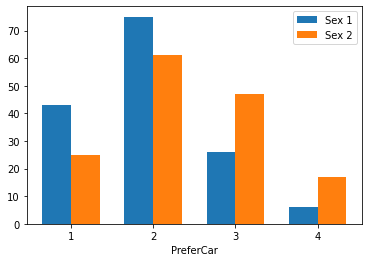

In [ ]:
data_2 = data[['Sex', 'PreferCar']]
 
data_2 = data_2.groupby('Sex').PreferCar.value_counts().to_frame().unstack().PreferCar.reset_index(drop=True)
x = np.arange(1,5)
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, data_2.iloc[0], width, label='Sex 1')
rects2 = ax.bar(x + width/2, data_2.iloc[1], width, label='Sex 2')

ax.set_xticks(x)
ax.set_xlabel('PreferCar')
ax.legend()

Из графика можно предположить, что машины типа "1" и "2", покупают больше  женщины, а машины типа "3", "4" больше покупают мужчины.

In [ ]:
stat, p, dof, expected = st.chi2_contingency(data_crosstab)
print('Значение статистики = {}, p-value={}'.format(stat,pv))

Значение статистики = 17.507847808569526, p-value=0.02346891262690166


Нам необходимо проверить существование значимости между категориальными переменными. Для этой цели мы будем использовать критерий $\chi^2$, который сравнивает наблюдаемые значения с ожидаемыми.

В результате применения критерия получаем, что статистика равна - 17.507847808569526. Нулевая гипотеза гласит, что категоиальные переменные независимы.
p-value < 0.05, значит мы отвергаем нулевую гипотезу и получаем что выбор машины зависит от пола.

# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented) 
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

##Пункт 1

In [ ]:
data = get_dataset('master')
data_1 = data[data['country']=='Israel']

In [ ]:
data.country.value_counts()

Iceland                   382
Austria                   382
Netherlands               382
Mauritius                 382
Italy                     372
                         ... 
Bosnia and Herzegovina     24
Dominica                   12
Macau                      12
Cabo Verde                 12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [ ]:
data_1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
12416,Israel,1985,male,75+ years,24,66600,36.04,Israel1985,0.768,"27,493,591,484",7325,G.I. Generation
12417,Israel,1985,male,55-74 years,48,249100,19.27,Israel1985,0.768,"27,493,591,484",7325,G.I. Generation
12418,Israel,1985,female,75+ years,10,75500,13.25,Israel1985,0.768,"27,493,591,484",7325,G.I. Generation
12419,Israel,1985,male,35-54 years,41,396400,10.34,Israel1985,0.768,"27,493,591,484",7325,Silent
12420,Israel,1985,female,55-74 years,28,290900,9.63,Israel1985,0.768,"27,493,591,484",7325,G.I. Generation


In [ ]:
data_y = data_1.groupby('year',as_index=False).sum()

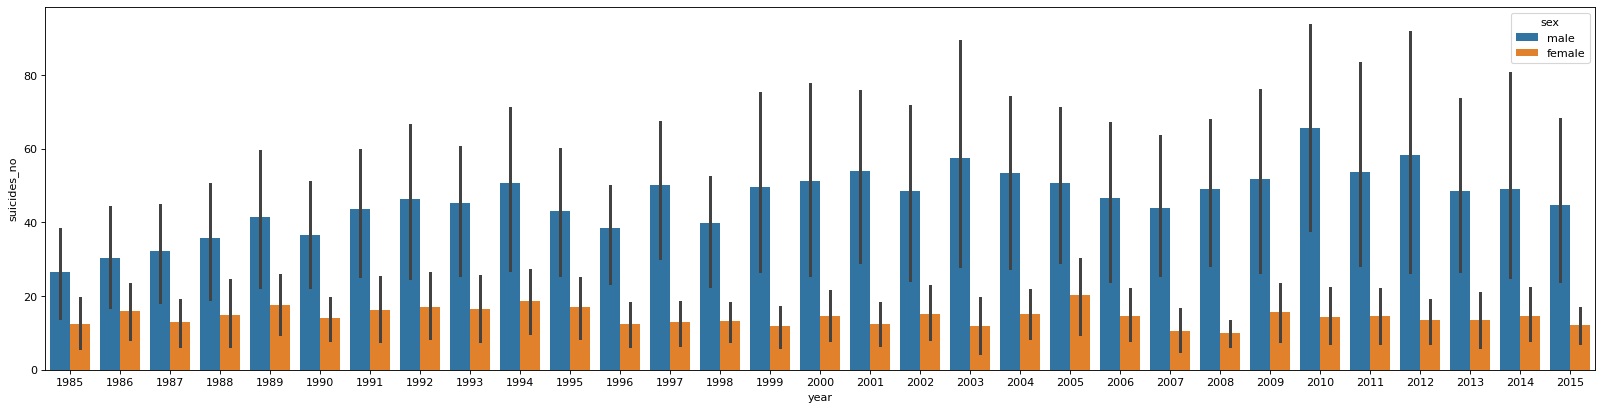

In [ ]:
fig = plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes()
sns.barplot(x='year', y='suicides_no', data=data_1, hue='sex', ax=ax1)

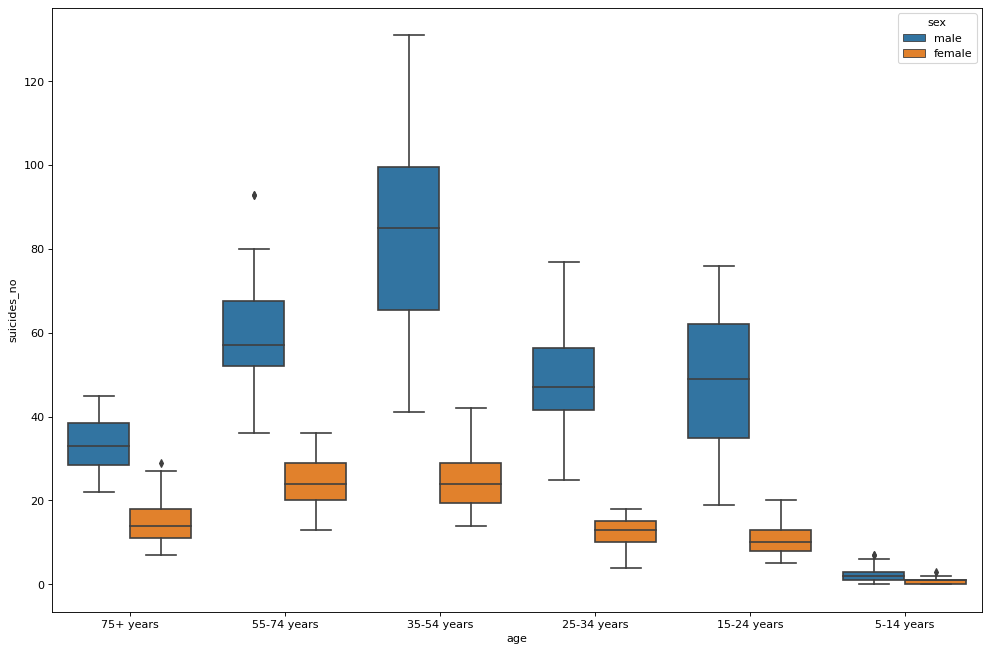

In [ ]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes()
sns.boxplot(x='age', y='suicides_no', data=data_1, hue='sex',ax=ax1) 

Для проверки статистической разницы между группами мужчин и женщин сгруппируем данные по полу и количеству лет.

In [ ]:
data_men = data_1[data_1.sex=='male'].groupby('year')['suicides_no'].sum()
data_women = data_1[data_1.sex=='female'].groupby('year')['suicides_no'].sum()

Воспользуемся либо тестом Стьюдента либо тестом Уэлча для проверки статистической разницы, тесты отличаются между собой тем, что один предназначен дл выборок с равными дисперсиями, а другой для выборок с разными. Но чтобы им воспользоваться, выборки должны быть нормально распределены и диспресии выборок должны быть приблизительно равны. Поэтому проверим сначало нормальность выборок.

In [ ]:
def check_normality(data):
  stat, p_d = st.shapiro(data_men)
  alpha = 0.05
  if p_d <= alpha:
      print(f'(P-value == {p_d}) <= (alpha=={alpha})')
      print('H0 о нормальности выборки отвергается.')
  else:
      print(f'(P-value == {p_d}) > (alpha=={alpha})')
      print('Нет оснований для отвержения H0 о нормальности выборки.')

In [ ]:
check_normality(data_men)

(P-value == 0.7081555128097534) > (alpha==0.05)
Нет оснований для отвержения H0 о нормальности выборки.


In [ ]:
check_normality(data_women)

(P-value == 0.7081555128097534) > (alpha==0.05)
Нет оснований для отвержения H0 о нормальности выборки.


Отлично, нет оснований отвергнуть гипотезу о нормальности выборок, теперь проверим равенство дисперсий.

In [ ]:
def check_var_equal(data_1, data_2):
  stat, p_d = st.levene(data_1,data_2)
  alpha = 0.05
  if p_d <= alpha:
      print(f'(P-value == {p_d}) <= (alpha=={alpha})')
      print('H0 о равенстве дисперсий отвергается.')
  else:
      print(f'(P-value == {p_d}) > (alpha=={alpha})')
      print('Нет оснований для отвержения H0 о равенстве дисперсий.')

In [ ]:
check_var_equal(data_women, data_men)

(P-value == 7.725558960813497e-05) <= (alpha==0.05)
H0 о равенстве дисперсий отвергается.


Диспресии не равны, значит используем критерий Уэлча.

In [ ]:
stat, p = st.ttest_ind(data_women, data_men, equal_var=False)

if p <= alpha:
    print(f'(P-value == {p}) <= (alpha=={alpha})')
    print('H0 о равенстве средних отвергается.')
else:
    print(f'(P-value == {p}) > (alpha=={alpha})')
    print('Нет оснований для отвержения H0 о равенстве средних.') 

(P-value == 1.078821106234556e-20) <= (alpha==0.05)
H0 о равенстве средних отвергается.


p-value < 0.05, значит гипотеза об однородности выборки отвергается, значит статистическая разница в количестве самоубийств между мужчинами и женщинами существует В ИЗРАИЛЕ. И это совершенно не гарантирует нам наличия таких же результатов по всему миру. Чтобы это выяснить необходимо провести исследования данных по всем странам.

#Пункт 2

Выберем данные для 2016 года.

In [ ]:
suicides_2016 = data[data.year==2016]

Рассмотрим дисперсии признака в зависимости от стран

In [ ]:
suicides_2016.groupby('country')['gdp_per_capita ($)'].std()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,suicides/100k pop,gdp_per_capita ($)
country,,
Armenia,5.717786,0.0
Austria,19.560423,0.0
Croatia,22.474713,0.0
Cyprus,4.754007,0.0
Czech Republic,14.856132,0.0
Grenada,0.000000,0.0
Hungary,25.772490,0.0
Iceland,12.938891,0.0
Lithuania,34.437834,0.0


Дисперсии ВВП на душу населения равны 0, значит у каждой страны все значения этого признака одинаковы. Посмотрим на них

In [ ]:
suicides_2016.groupby('country')['gdp_per_capita ($)'].mean().sort_values(ascending=False)

country
Iceland           64708
Qatar             62484
Sweden            55594
Netherlands       48108
Austria           46976
Cyprus            25098
Czech Republic    19505
Lithuania         15742
Hungary           13448
Croatia           12905
Grenada           10838
Mauritius         10570
Romania           10020
Thailand           6713
Mongolia           4145
Armenia            3788
Name: gdp_per_capita ($), dtype: int64

Можно разбить все страны на группы согласно квартилям, тогда получим 4 группы: низкий уровень, ниже/выше среднего, высокий.

In [ ]:
quartiles_series = pd.qcut(suicides_2016['gdp_per_capita ($)'], [0, .25, .5, .75, 1.])

In [ ]:
uniq_quartiles = set(quartiles_series)

In [ ]:
#поставим каждой записи категориальную метку, соответсвующую интервалу
suicides_2016['quartiles'] = quartiles_series.replace({q : i for i, q in enumerate(sorted(uniq_quartiles))})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Получим следующее разбиение по группам

In [ ]:
suicides_2016.groupby(['quartiles','country']).mean()

year  suicides_no  ...  gdp_per_capita ($)  quantiles
quartiles country                              ...                               
0         Armenia         2016.0          6.7  ...              3788.0        0.0
          Mongolia        2016.0         42.3  ...              4145.0        0.0
          Romania         2016.0        195.3  ...             10020.0        0.0
          Thailand        2016.0        411.7  ...              6713.0        0.0
1         Croatia         2016.0         68.3  ...             12905.0        1.0
          Grenada         2016.0          0.0  ...             10838.0        1.0
          Hungary         2016.0        176.1  ...             13448.0        1.0
          Mauritius       2016.0          9.8  ...             10570.0        1.0
2         Austria         2016.0        120.1  ...             46976.0        2.0
          Cyprus          2016.0          3.6  ...             25098.0        2.0
          Czech Republic  2016.0        131.8  ...             19505.0        2.0
          Lithuania       2016.0         82.2  ...             15742.0        2.0
3         Iceland         2016.0          4.0  ...             64708.0        3.0
          Netherlands     2016.0        188.6  ...             48108.0        3.0
          Qatar           2016.0          6.8  ...             62484.0        3.0
          Sweden          2016.0        113.0  ...             55594.0        3.0

[16 rows x 7 columns]

In [ ]:
groups = [suicides_2016[suicides_2016.quartiles == i] for i in range(len(quantiles_series))]

Сагрегируем данные по признаку количества сабоубийств на 100 тысяч.

In [ ]:
groups_suid100 = [groups[i].groupby('country')['suicides/100k pop'].mean() for i in range(len(uniq_quartiles))]

In [ ]:
groups_suid100

[country
 Armenia      4.056
 Mongolia    18.439
 Romania     11.633
 Thailand     7.732
 Name: suicides/100k pop, dtype: float64, country
 Croatia      21.356
 Grenada       0.000
 Hungary      24.134
 Mauritius     9.930
 Name: suicides/100k pop, dtype: float64, country
 Austria           18.323
 Cyprus             4.715
 Czech Republic    16.176
 Lithuania         36.172
 Name: suicides/100k pop, dtype: float64, country
 Iceland        13.807
 Netherlands    12.739
 Qatar           1.643
 Sweden         13.884
 Name: suicides/100k pop, dtype: float64]

In [ ]:
alpha = 0.05

# Сравним дисперсии выборок:
stat, p_g = st.levene(*groups_suid100)

if p_g <= alpha:
    print(f'(P-value == {p_g}) <= (alpha=={alpha})')
    print('H0 о равенстве дисперсий отвергается.')
else:
    print(f'(P-value == {p_g}) > (alpha=={alpha})')
    print('Нет оснований для отвержения H0 о равенстве дисперсий.')

(P-value == 0.4866873037424947) > (alpha==0.05)
Нет оснований для отвержения H0 о равенстве дисперсий.


Проверим гипотезу о равенстве средних значений в группах с помощью теста ANOVA.

In [ ]:
stat, p_d = st.f_oneway(*groups_suid100)
if p_d <= alpha:
    print(f'(P-value == {p_d}) <= (alpha=={alpha})')
    print('H0 о равенстве дисперсий отвергается.')
else:
    print(f'(P-value == {p_d}) > (alpha=={alpha})')
    print('Нет оснований для отвержения H0 о равенстве средних.')

(P-value == 0.5792499747750927) > (alpha==0.05)
Нет оснований для отвержения H0 о равенстве средних.


Получаем, что проверка гипотезы о равенстве средних между группами стран, сформированных согласно квартилям признака ВВП на душу населения, не выявила статистических различий.